K = 1 | Accuracy = 0.90
K = 2 | Accuracy = 0.90
K = 3 | Accuracy = 0.93
K = 4 | Accuracy = 0.97
K = 5 | Accuracy = 0.93
K = 6 | Accuracy = 0.93
K = 7 | Accuracy = 0.90
K = 8 | Accuracy = 0.93
K = 9 | Accuracy = 0.97
K = 10 | Accuracy = 0.97
K = 11 | Accuracy = 0.97
K = 12 | Accuracy = 0.93
K = 13 | Accuracy = 1.00
K = 14 | Accuracy = 1.00
K = 15 | Accuracy = 1.00


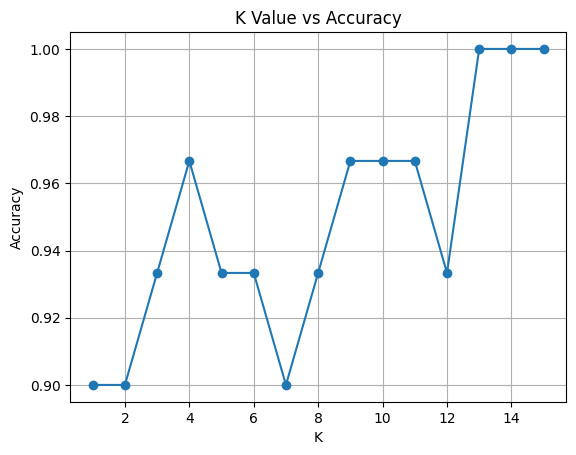


Best K: 13


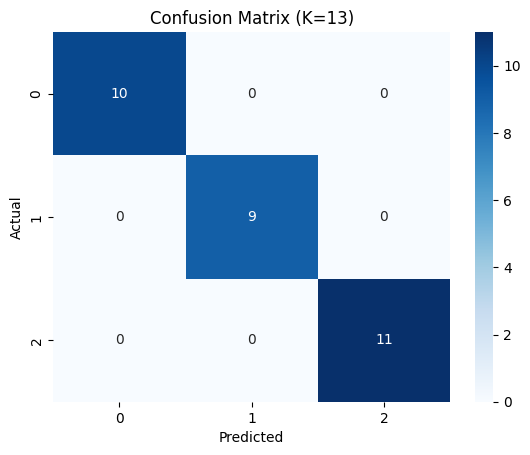

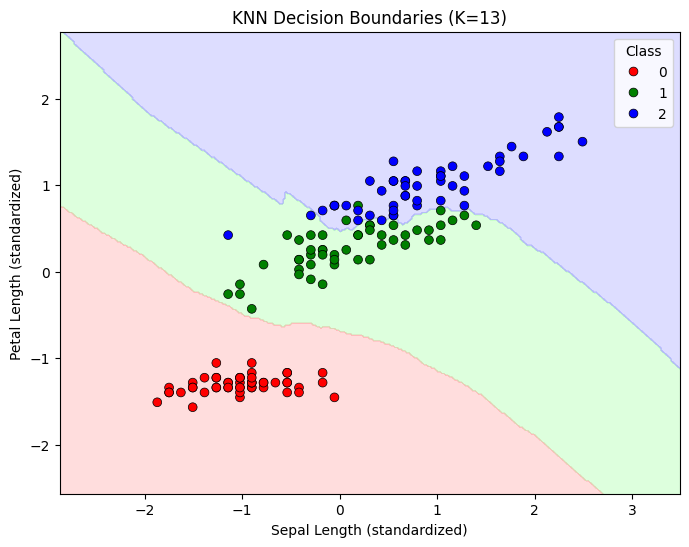

In [1]:
########################## SECTION-1 (IMPORT LIBRARIES) ###############################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

########################## SECTION-2 (LOAD & PREP DATA) ###############################
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Use only 2 features for easy visualization
X = X.iloc[:, [0, 2]]  # sepal length & petal length

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

########################## SECTION-3 (EXPERIMENT WITH DIFFERENT K VALUES) #############
k_range = range(1, 16)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    scores.append(acc)
    print(f"K = {k} | Accuracy = {acc:.2f}")

# Plot K vs Accuracy
plt.plot(k_range, scores, marker='o')
plt.title("K Value vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

########################## SECTION-4 (BEST K MODEL - CONFUSION MATRIX) ################
best_k = scores.index(max(scores)) + 1
print(f"\nBest K: {best_k}")

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix (K={best_k})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

########################## SECTION-5 (DECISION BOUNDARIES VISUALIZATION) #############
from matplotlib.colors import ListedColormap

h = 0.02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y, palette=cmap_bold, s=40, edgecolor='k')
plt.title(f"KNN Decision Boundaries (K={best_k})")
plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Petal Length (standardized)")
plt.legend(title='Class')
plt.show()
